# TP1 du module 4 : le travail sur les données.

Dans ce TP, nous allons explorer plus en détails le jeu de données du Titanic. Objectifs :
* Analyser des statistiques pour décrire les données
* Produire des visualisations pertinentes pour la compréhesion des données.
* Nettoyer le jeu de données
* Préparer les données pour qu'elles soient prêtes à être fournies à un algorithme d'apprentissage.

In [113]:
# Ajoutez ici les imports de librairies nécessaires
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# need des histogrammes avec histplot() de seaborn (pour des historiques)
# need des barres avec catplot() de seaborn (pour catégoriser)
# need des comptages avec countplot() de seaborn (pour compter)
# need matrice de corrélations: heatmpap

VARIABLE DESCRIPTIONS:

survival        Survival

                (0 = No; 1 = Yes)

pclass          Passenger Class

                (1 = 1st; 2 = 2nd; 3 = 3rd)

name            Name

sex             Sex

age             Age

sibsp           Number of Siblings/Spouses Aboard

parch           Number of Parents/Children Aboard

ticket          Ticket Number

fare            Passenger Fare

cabin           Cabin

embarked        Port of Embarkation

                (C = Cherbourg; Q = Queenstown; S = Southampton)


SPECIAL NOTES:

Pclass is a proxy for socio-economic status (SES)

 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower


Age is in Years; Fractional if Age less than One (1)

 If the Age is Estimated, it is in the form xx.5


With respect to the family relation variables (i.e. sibsp and parch)

some relations were ignored.  The following are the definitions used

for sibsp and parch.


Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic


Other family relatives excluded from this study include cousins,

nephews/nieces, aunts/uncles, and in-laws.  Some children travelled

only with a nanny, therefore parch=0 for them.  As well, some

travelled with very close friends or neighbors in a village, however,

the definitions do not support such relations.


In [140]:
df = pd.read_csv('../data/raw/Titanic3.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploration du jeu de données

Commencez par répondre au question suivante. Prenez le temps de bien analyser vos réponses, afin de mieux vous familiariser avec le contenu du jeu de données.

1. Combien de données dans le jeu de données Titanic ?

891 entries, 0 to 890

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. Combien d'attributs compte le jeu de données ?

il y a 12 columns

3. Identifiez quelles colonnes contiennent des données discrètes, et lesquelles contiennent des données continues.

données discrètes:

0 : PassengerId : int64

1 : Survived : int64

2 : Pclass : int64

5 : Age : float64

6 : SibSp : int64

7 : Parch : int64

9 : Fare : float64

 -----------

 données continues:

 3 : Name : object

 4 : Sex : object

 8 : Ticket : object

 10 : Cabin : object

 11 : Embarked : object


4. De la même manière, identifiez les colonnes de données qualitatives, et celles de données quantitatives.

données quantitatives :
 0 : PassengerId : int64
1 : Survived : int64
2 : Pclass : int64
5 : Age : float64
6 : SibSp : int64
7 : Parch : int64
9 : Fare : float64
 -----------
 données qualitatives :
 3 : Name : object
 4 : Sex : object
 8 : Ticket : object
 10 : Cabin : object
 11 : Embarked : object

5. Affichez les statistiques de base sur les colonnes quantitatives du dataset. 
Quelles informations pouvez-vous en retirer ? Pour chaque attribut, cherchez au moins une information pertinente que vous pouvez déduire de vos observations.

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


données quantitatives :

0 : PassengerId : int64 -> de 1 à 891

1 : Survived : int64 -> bool 1 ou 0 (oui / non)

2 : Pclass : int64 ->  la classe du passager 1 ou 2 ou 3 (Pclass is a proxy for socio-economic status (SES) : 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower)

5 : Age : float64 -> Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5 / il manque des données

6 : SibSp : int64 -> Number of Siblings/Spouses Aboard

7 : Parch : int64 -> Number of Parents/Children Aboard

9 : Fare : float64 -> Passenger Fare


6. Sur une figure avec 6 sous-figures, proposez un histogramme pour visualiser la répartition des valeurs sur les attributs suivants : Survived, Pclass, Sex, Embarked, Age, Fare. Pour chaque figure, quelle(s) observation(s) pouvez-vous faire ?

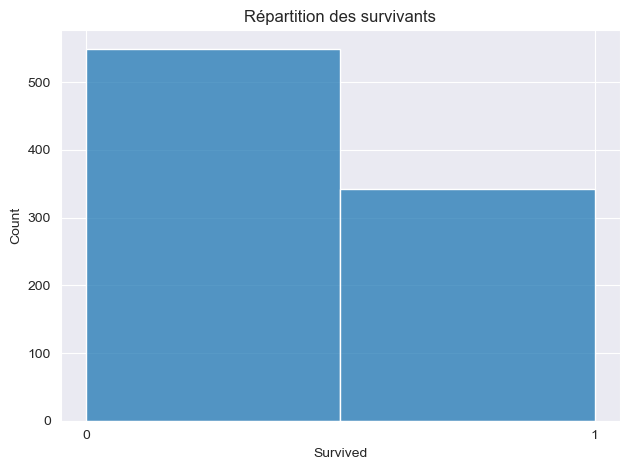

In [117]:

# Histogramme pour Survived
histo_survived = sns.histplot(data=df, x='Survived', bins=2)
histo_survived.set_title('Répartition des survivants')
histo_survived.set_xticks([0,1])

# Ajuster la disposition
plt.tight_layout()
plt.show()

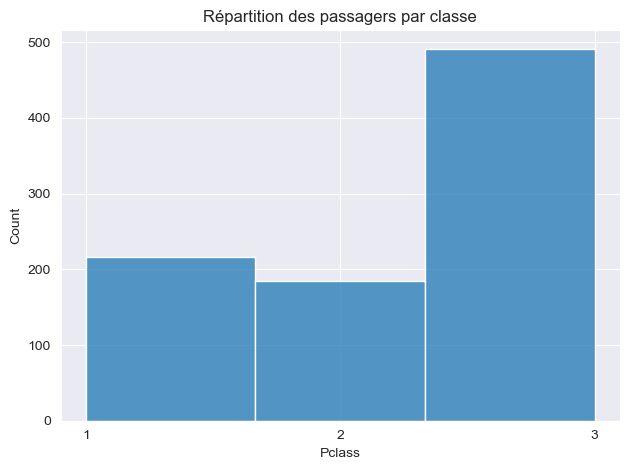

In [118]:

# Histogramme pour Pclass
histo_class = sns.histplot(data=df, x='Pclass', bins=3)
histo_class.set_xticks([1,2,3])
histo_class.set_title('Répartition des passagers par classe')

# Ajuster la disposition
plt.tight_layout()
plt.show()

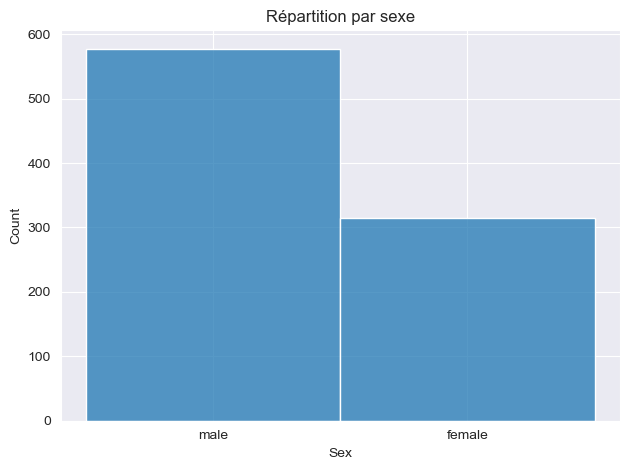

In [119]:

# Histogramme pour Sex
histo_sex = sns.histplot(data=df, x='Sex')
histo_sex.set_title('Répartition par sexe')

# Ajuster la disposition
plt.tight_layout()
plt.show()

C:\Users\fhoulette2023\AppData\Local\Temp\1\ipykernel_9836\2264615066.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  histo_embarked.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])


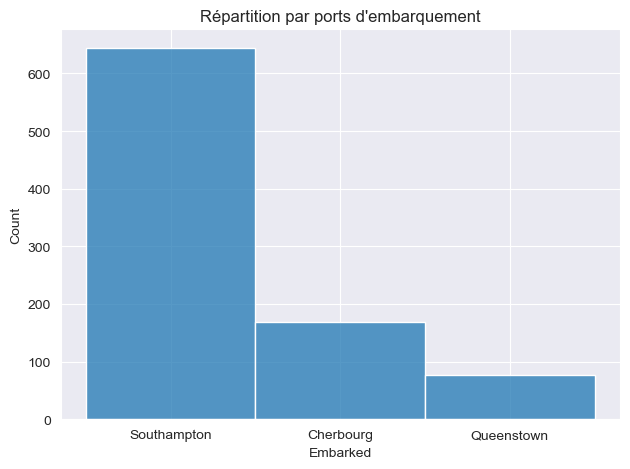

In [120]:

# Histogramme pour Embarked
df['Embarked'] = pd.Categorical(df['Embarked'], categories=['S', 'C', 'Q'], ordered=True)
histo_embarked = sns.histplot(data=df, x='Embarked')
histo_embarked.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
histo_embarked.set_title('Répartition par ports d\'embarquement')

# Ajuster la disposition
plt.tight_layout()
plt.show()

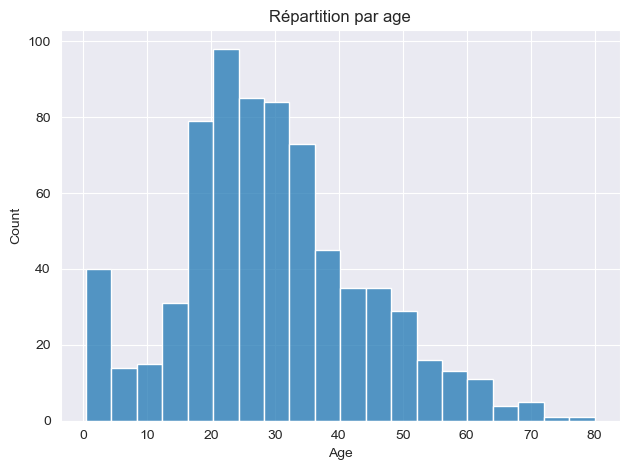

In [121]:

# Histogramme pour Age
histo_age = sns.histplot(data=df, x='Age')
histo_age.set_title('Répartition par age')

# Ajuster la disposition
plt.tight_layout()
plt.show()

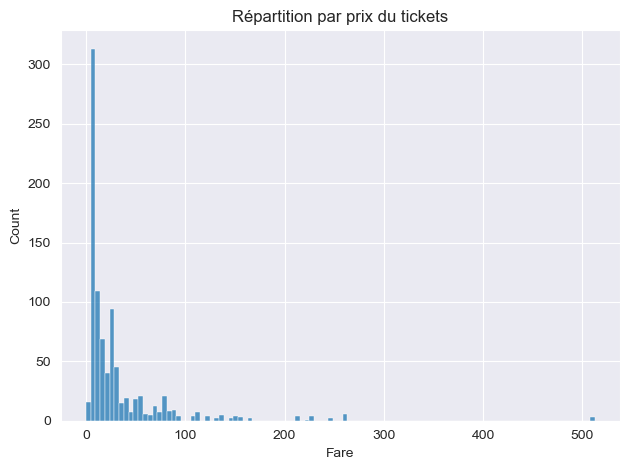

In [122]:

# Histogramme pour Fare
histo_fare = sns.histplot(data=df, x='Fare')
histo_fare.set_title('Répartition par prix du tickets')

# Ajuster la disposition
plt.tight_layout()
plt.show()

7. Sur un même graphique, représentez, pour chaque genre, le nombre de personnes ayant survécu. Que pouvez-vous en déduire ? Le genre d'un passager vous parait-il pertinent pour qu'un modèle d'apprentissage puisse prédire si ce passager a survécu ?

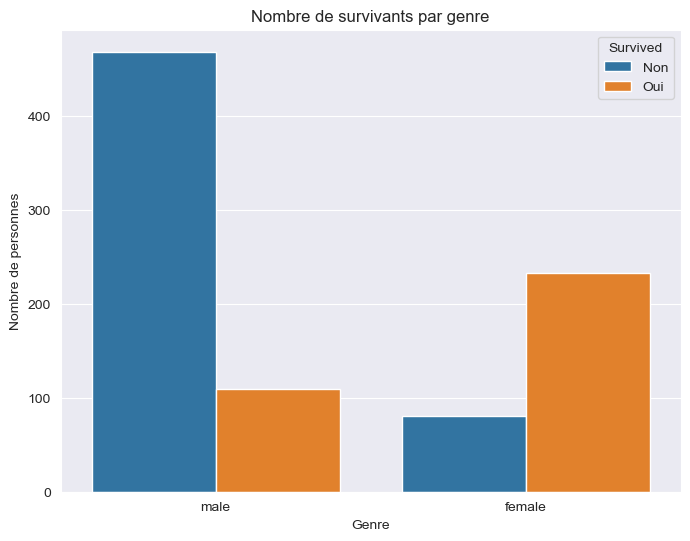

In [123]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Nombre de survivants par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de personnes')
plt.legend(title='Survived', loc='upper right', labels=['Non', 'Oui'])
plt.show()

plus de femmes ont survécu que d'hommes: femmes prioritaires pour l'évacuation

8. En vous basant sur une visualisation, observez-vous une corrélation entre certains attributs ? Que pouvez-vous en déduire pour un futur modèle d'apprentissage ?

In [124]:
print(df['Embarked'].value_counts(dropna=False))

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [129]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Imputer 'Age' (numérique)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Imputer 'Embarked' (catégorielle)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

embarked_map = {'S': 1, 'C': 2, 'Q': 3}
df['Embarked_num'] = df['Embarked'].map(embarked_map)
df['Embarked_num'] = df['Embarked_num'].fillna(0).astype(int)

# Colonnes catégorielles à encoder
categorical_cols = ['Sex']

# Colonnes numériques à garder
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_num']

# Ici, PAS de conversion globale en numérique !
# Extraire les colonnes catégorielles sous forme de DataFrame
df_cat = df[categorical_cols]

# Extraire les colonnes numériques
df_num = df[num_cols]

# OneHotEncoder (avec sparse=False pour DataFrame)
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concaténer les données numériques et encodées
df_clean = pd.concat([df_num.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(df_clean.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Embarked_num  Sex_male
0         0       3  22.0      1      0   7.2500             1       1.0
1         1       1  38.0      1      0  71.2833             2       0.0
2         1       3  26.0      0      0   7.9250             1       0.0
3         1       1  35.0      1      0  53.1000             1       0.0
4         0       3  35.0      0      0   8.0500             1       1.0


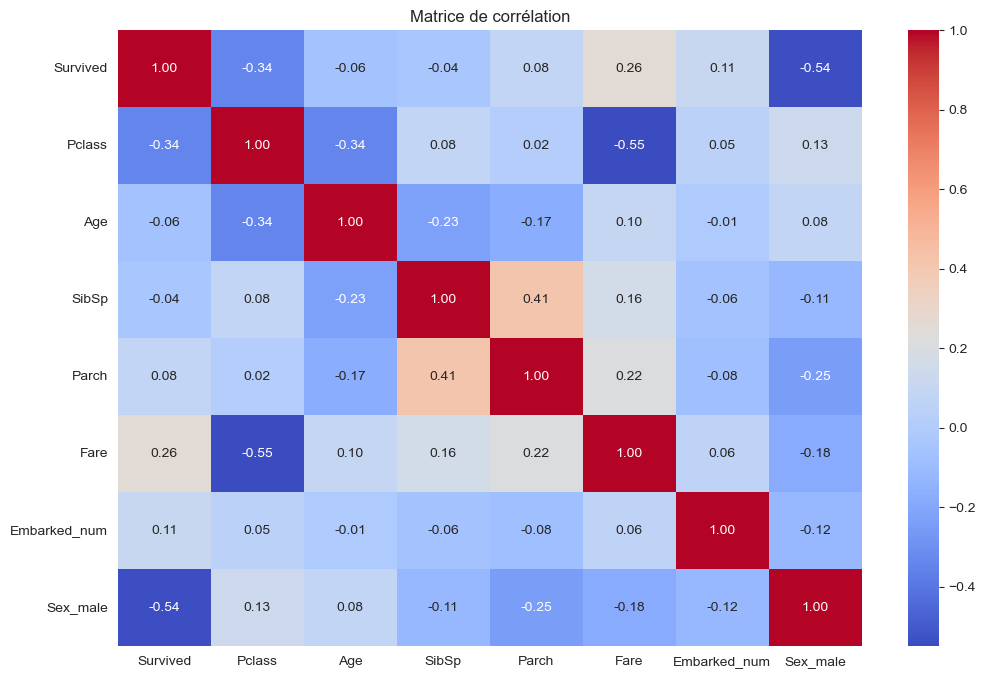

In [130]:
corr = df_clean.corr()

# Affichage heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

In [133]:
print(corr)

              Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived      1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
Pclass       -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
Age          -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
SibSp        -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
Parch         0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
Fare          0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
Embarked_num  0.106811  0.045702 -0.009165 -0.059961 -0.078665  0.062142   
Sex_male     -0.543351  0.131900  0.081163 -0.114631 -0.245489 -0.182333   

              Embarked_num  Sex_male  
Survived          0.106811 -0.543351  
Pclass            0.045702  0.131900  
Age              -0.009165  0.081163  
SibSp            -0.059961 -0.114631  
Parch            -0.078665 -0.245489  
Fare              0.062142 -0.182333  
Embarked_num      1.000000 -0.116569  
Sex

Sex_male	-0.54	Forte corrélation négative : les hommes ont moins survécu

Pclass	-0.34	Classe plus basse = moins de chances de survie

Fare	0.26	Tarif plus élevé lié à plus de survie (souvent 1ère classe)

Sexe et classe sociale sont des facteurs clés pour expliquer la survie.

9. En vous basant sur vos observations de la visualisation précédente, confirmez vos impressions en proposant deux visualisations. Par exemple, si vous avez observé une corrélation entre un attribut A et un attribut B, mettez en valeur le fait que les mêmes valeurs de A sont souvent trouvées avec les mêmes valeurs de B. 

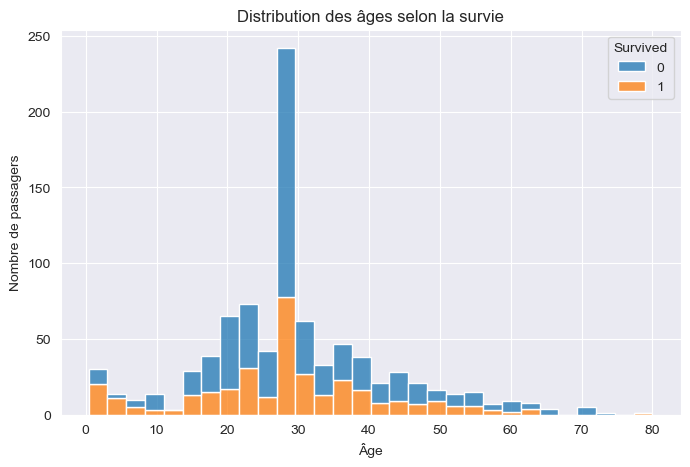

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=False)
plt.title("Distribution des âges selon la survie")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

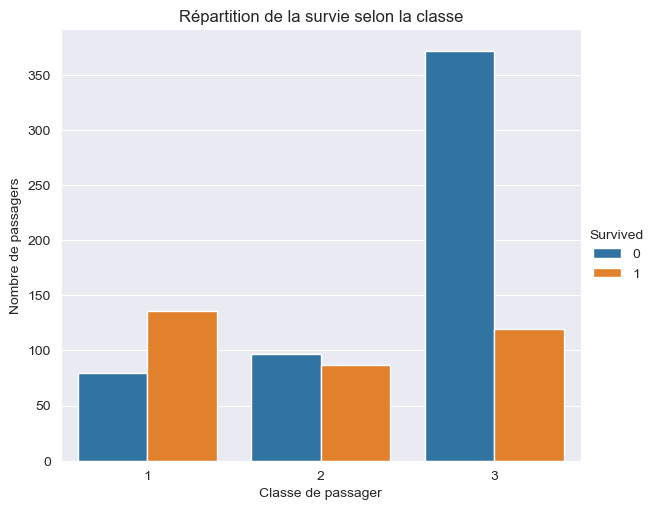

In [136]:
sns.catplot(data=df, x='Pclass', kind='count', hue='Survived', height=5, aspect=1.2)
plt.title("Répartition de la survie selon la classe")
plt.xlabel("Classe de passager")
plt.ylabel("Nombre de passagers")
plt.show()

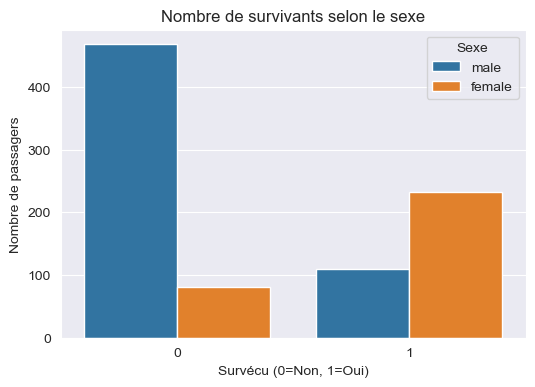

In [137]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Nombre de survivants selon le sexe")
plt.xlabel("Survécu (0=Non, 1=Oui)")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe")
plt.show()

10. Mettez-vous à présent dans le rôle d'un data analyst face à un nouveau jeu de données : quelles autres visualisations vous paraissent nécessaires ? Proposez au moins trois visualisations qui vous semblent pertinentes. Gardez en tête que l'objectif sur ce jeu de données sera de réussir à prédire si un passager à survécu ou non.

Boxplot de l’âge selon la survie

Barplot du taux de survie selon la classe (Pclass)

Heatmap des corrélations entre variables numériques

## Nettoyage des données
1. Pour chaque colonne, comptez le nombre de valeurs nulles.

In [141]:
# compter le nombre de colonnes nulles
df.isna().sum() # des ages sont nulles

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Traitement du port d'embarquement

2. Les valeurs manquantes du port d'embarquement sont très peu nombreuses. De plus, s'agissant d'un attribut discret, nous pouvons considérer l'information de valeur nulle comme une valeur possible supplémentaire. Commencer par affichez les lignes pour lesquelles le port d'embarquement n'est pas renseigné.

3. Remplacez ces valeurs nulles par la valeur 'U' (pour unknown). Vérifiez vos résultats en réaffichant les lignes obtenues ci-dessus :

### Traitement du numéro de cabine

4. Le numéro de cabine est l'attribut qui contient le plus de valeurs nulles. Cet attribut n'a pas de lien évident avec la survie des passagers. Supprimer cette colonne dans votre dataframe.

### Traitement de l'âge
5. L'âge est un attribut plus délicat à traiter : il contient un nombre conséquent de valeur nulle, mais il est très pertinent à prendre en compte pour la prédiction de la survie d'un passager, ces deux informations étant assez fortement corrélées. Il existe plein de stratégies pour remplacer ces valeurs manquantes :
* Mettre une valeur aléatoire '(tirée entre le min et le max)
* Remplacer par la moyenne
* Remplacer par une valeur déterminée en fonction des autres paramètres (classe, age, etc)

Commencer par calculer pour chaque genre et pour chaque classe, l'âge moyen (6 valeurs à obtenir au total).

6. Pour chaque ligne du jeu de données, si l'âge est manquant, remplacez la valeur nulle par une des valeurs calculées ci-dessus. basez-vous sur le genre et la classe du passager pour choisir la bonne valeur. 

## Préparer les données

Nous entrons dans la dernière phase de traitement des données : nous allons terminer des les mettre en forme, pour qu'elles soient prêtes à être manipulées dans un processus d'apprentissage.

# Encodage des données catégorielles

1. Réaffichez les infos sur le jeu de données. Vous devez avoir 11 colonnes, toutes remplies avec 891 valeurs.

2. Trois colonnes sont liées à l'identification unique d'un passager, et ne sont pas pertinentes pour la prédiction de la survie. Supprimez ces trois colonnes de votre jeu de données.

3. Reproduisez une manipulation vue au module 3 : combinez deux colonnes relatives aux familles de passagers pour n'en faire plus qu'une. Pensez à supprimer les deux anciennes colonnes.

4. Parmi les colonnes restantes, sur lesquelles un encodage one-hot vous semble pertinent ? En vous appuyant sur [la documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), appliquez cet encodage aux colonnes identifiées. Enfin, pensez à supprimer les anciennes colonnes.

Note : pour le genre, il n'y a que deux possibilités dans ce jeu de données. Avec l'option `if_binary` de l'encodeur, vous pouvez ne générer qu'une seule colonne (l'autre s'obtenant immédiatement par déduction).

5. Vous devez à présent avoir un jeu de données sur 10 attributs, tous numériques (`int64` ou `float64`), sans aucune valeur nulle. Enregistrer ce jeu de données au format csv, afin de pouvoir le réutiliser par la suite. Il est inutile de sauvegarder l'index présent dans le dataframe.

# Fin du TP !